# Sales Data Analysis

## Ingest

In [1]:
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt
print("hello world")


hello world


In [2]:
# get data for all files with their paths

directory_path = f"{os.getcwd()}/data"
files = []

for filename in os.listdir(directory_path):
    if os.path.isfile(os.path.join(directory_path, filename)):
        files.append(filename)

print(files[:5])


['sales_week_starting_2013-01-07.csv', 'sales_week_starting_2012-12-24.csv', 'sales_week_starting_2012-12-31.csv', 'sales_week_starting_2013-04-22.csv', 'sales_week_starting_2012-10-08.csv']


In [3]:
# go through all csv files and create a single dataframe
df = pd.DataFrame()

for file in files:
    temp_df = pd.read_csv(f"data/{file}")

    df = pd.concat([temp_df, df], ignore_index=True)


In [4]:
df.head()


,sale_time,purchaser_gender
0,2013-08-12 01:10:47,male
1,2013-08-12 02:07:00,female
2,2013-08-12 02:09:54,male
3,2013-08-12 02:16:23,male
4,2013-08-12 02:23:33,female


## EDA

### get descriptive stats about the data

In [5]:
df


,sale_time,purchaser_gender
0,2013-08-12 01:10:47,male
1,2013-08-12 02:07:00,female
2,2013-08-12 02:09:54,male
3,2013-08-12 02:16:23,male
4,2013-08-12 02:23:33,female
...,...,...
204324,2013-01-13 22:23:42,female
204325,2013-01-13 22:24:26,female
204326,2013-01-13 22:29:54,female
204327,2013-01-13 22:56:41,female


### Plot daily sales for all 50 weeks.


In [6]:
# first convert the date column to proper datetime format
df["sale_time"] = pd.to_datetime(df["sale_time"])
df.head()


,sale_time,purchaser_gender
0,2013-08-12 01:10:47,male
1,2013-08-12 02:07:00,female
2,2013-08-12 02:09:54,male
3,2013-08-12 02:16:23,male
4,2013-08-12 02:23:33,female


In [7]:
# extract the year, week and day into separate columns
df[["year", "week", "day"]] = df["sale_time"].dt.isocalendar()
df.head()


,sale_time,purchaser_gender,year,week,day
0,2013-08-12 01:10:47,male,2013,33,1
1,2013-08-12 02:07:00,female,2013,33,1
2,2013-08-12 02:09:54,male,2013,33,1
3,2013-08-12 02:16:23,male,2013,33,1
4,2013-08-12 02:23:33,female,2013,33,1


In [8]:
# get date column
df["date"] = pd.to_datetime(df["sale_time"].dt.date)
df.head()


,sale_time,purchaser_gender,year,week,day,date
0,2013-08-12 01:10:47,male,2013,33,1,2013-08-12
1,2013-08-12 02:07:00,female,2013,33,1,2013-08-12
2,2013-08-12 02:09:54,male,2013,33,1,2013-08-12
3,2013-08-12 02:16:23,male,2013,33,1,2013-08-12
4,2013-08-12 02:23:33,female,2013,33,1,2013-08-12


In [9]:
df[["week", "date"]].value_counts().sort_index(level=0).head(30)


week  date      
1     2012-12-31    538
      2013-01-01    458
      2013-01-02    532
      2013-01-03    510
      2013-01-04    536
      2013-01-05    497
      2013-01-06    497
2     2013-01-07    550
      2013-01-08    494
      2013-01-09    445
      2013-01-10    536
      2013-01-11    409
      2013-01-12    469
      2013-01-13    472
3     2013-01-14    458
      2013-01-15    517
      2013-01-16    521
      2013-01-17    522
      2013-01-18    519
      2013-01-19    547
      2013-01-20    474
4     2013-01-21    521
      2013-01-22    503
      2013-01-23    491
      2013-01-24    514
      2013-01-25    504
      2013-01-26    484
      2013-01-27    445
5     2013-01-28    453
      2013-01-29    533
Name: count, dtype: int64

<Axes: xlabel='date'>

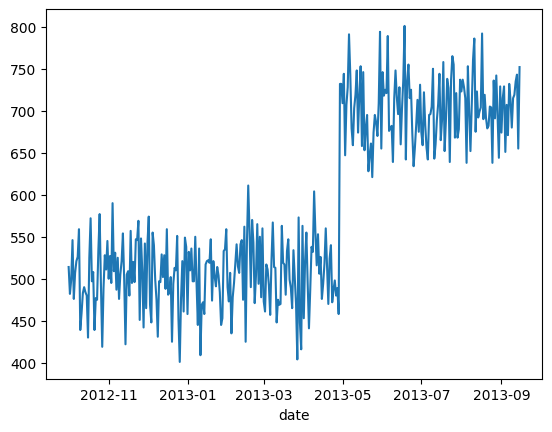

In [10]:
# plot sales for all days
df["date"] = df["sale_time"].dt.date
(
    df.sort_values("sale_time", ascending=True).groupby("date").size().plot()
)


### It looks like there has been a sudden change in daily sales. What date did it occur?


In [11]:
df.head()


,sale_time,purchaser_gender,year,week,day,date
0,2013-08-12 01:10:47,male,2013,33,1,2013-08-12
1,2013-08-12 02:07:00,female,2013,33,1,2013-08-12
2,2013-08-12 02:09:54,male,2013,33,1,2013-08-12
3,2013-08-12 02:16:23,male,2013,33,1,2013-08-12
4,2013-08-12 02:23:33,female,2013,33,1,2013-08-12


<Axes: xlabel='date'>

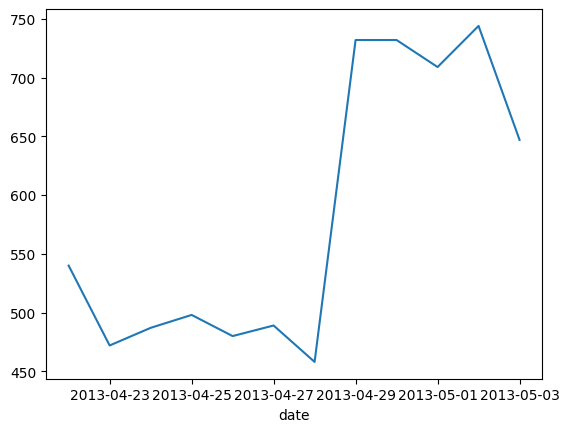

In [12]:
# from the plot above we can see that there is a change on 2013-05, so get data from 03-07
mask1 = pd.to_datetime(df["date"]).between("2013-04-22", "2013-05-03")
df["date"] = df["sale_time"].dt.date
(
    df[mask1].sort_values("sale_time", ascending=True).groupby(
        "date").size().plot()
)

# the


In [13]:
# get the daily sales
df["date"] = df["sale_time"].dt.date
daily_sales = df.sort_values(
    "sale_time", ascending=True).groupby("date").size()

daily_sales


date
2012-10-01    514
2012-10-02    482
2012-10-03    499
2012-10-04    546
2012-10-05    476
             ... 
2013-09-11    719
2013-09-12    735
2013-09-13    743
2013-09-14    655
2013-09-15    752
Length: 350, dtype: int64

In [14]:
# create a dataframe
df_daily_sales = pd.DataFrame(
    daily_sales.values, index=daily_sales.index, columns=["sales"])

df_daily_sales


,sales
date,
2012-10-01,514
2012-10-02,482
2012-10-03,499
2012-10-04,546
2012-10-05,476
...,...
2013-09-11,719
2013-09-12,735
2013-09-13,743


In [15]:
# get the previous day sales
df_daily_sales["previous_day"] = df_daily_sales.shift(1)
df_daily_sales


,sales,previous_day
date,,
2012-10-01,514,NaN
2012-10-02,482,514.0
2012-10-03,499,482.0
2012-10-04,546,499.0
2012-10-05,476,546.0
...,...,...
2013-09-11,719,715.0
2013-09-12,735,719.0
2013-09-13,743,735.0


In [16]:
# get the difference b/w prev day
df_daily_sales["diff_w_prev_day"] = df_daily_sales["sales"] - \
    df_daily_sales["previous_day"]

df_daily_sales


,sales,previous_day,diff_w_prev_day
date,,,
2012-10-01,514,NaN,NaN
2012-10-02,482,514.0,-32.0
2012-10-03,499,482.0,17.0
2012-10-04,546,499.0,47.0
2012-10-05,476,546.0,-70.0
...,...,...,...
2013-09-11,719,715.0,4.0
2013-09-12,735,719.0,16.0
2013-09-13,743,735.0,8.0


In [17]:
# sort the difference column in desc order to see the top difference days
df_daily_sales.sort_values(
    by="diff_w_prev_day", ascending=False
).head()


,sales,previous_day,diff_w_prev_day
date,,,
2013-04-29,732,458.0,274.0
2013-03-28,573,404.0,169.0
2013-03-31,563,416.0,147.0
2013-02-16,544,425.0,119.0
2013-08-06,753,638.0,115.0


In [18]:
# get the date which had the most difference with its previous day
df_daily_sales["diff_w_prev_day"].idxmax()


datetime.date(2013, 4, 29)

In [19]:
# show how much difference
df_daily_sales.loc[df_daily_sales["diff_w_prev_day"].idxmax()]


sales              732.0
previous_day       458.0
diff_w_prev_day    274.0
Name: 2013-04-29, dtype: float64

### Is the change in daily sales at the date you selected statistically significant? If so, what is the p-value?


In [20]:
from scipy import stats


In [21]:
df_daily_sales.head()


,sales,previous_day,diff_w_prev_day
date,,,
2012-10-01,514,NaN,NaN
2012-10-02,482,514.0,-32.0
2012-10-03,499,482.0,17.0
2012-10-04,546,499.0,47.0
2012-10-05,476,546.0,-70.0


In [22]:
# lets see if there are nan values
df_daily_sales.isna()


,sales,previous_day,diff_w_prev_day
date,,,
2012-10-01,False,True,True
2012-10-02,False,False,False
2012-10-03,False,False,False
2012-10-04,False,False,False
2012-10-05,False,False,False
...,...,...,...
2013-09-11,False,False,False
2013-09-12,False,False,False
2013-09-13,False,False,False


In [23]:
# lets see how many are there
df_daily_sales.isna().value_counts()


sales  previous_day  diff_w_prev_day
False  False         False              349
       True          True                 1
Name: count, dtype: int64

In [24]:
# lets drop all nan values
df_daily_sales.dropna(inplace=True)
df_daily_sales.isna()


,sales,previous_day,diff_w_prev_day
date,,,
2012-10-02,False,False,False
2012-10-03,False,False,False
2012-10-04,False,False,False
2012-10-05,False,False,False
2012-10-06,False,False,False
...,...,...,...
2013-09-11,False,False,False
2013-09-12,False,False,False
2013-09-13,False,False,False


In [25]:
# compare the max change with all daily sales
(
    stats
    .ttest_1samp(
        df_daily_sales["sales"],
        732
    )
)


TtestResult(statistic=-26.273266340051002, pvalue=1.3019593251472028e-84, df=348)

### Does the data suggest that the change in daily sales is due to a shift in the proportion of male-vs-female customers? Please use plots to support your answer (a rigorous statistical analysis is not necessary).


In [28]:
df_daily_sales.sort_values(by="diff_w_prev_day", ascending=False)


,sales,previous_day,diff_w_prev_day
date,,,
2013-04-29,732,458.0,274.0
2013-03-28,573,404.0,169.0
2013-03-31,563,416.0,147.0
2013-02-16,544,425.0,119.0
2013-08-06,753,638.0,115.0
...,...,...,...
2013-03-29,448,573.0,-125.0
2013-01-11,409,536.0,-127.0
2013-02-15,425,562.0,-137.0


In [35]:
df.head(2)


,sale_time,purchaser_gender,year,week,day,date
0,2013-08-12 01:10:47,male,2013,33,1,2013-08-12
1,2013-08-12 02:07:00,female,2013,33,1,2013-08-12


In [51]:
# get the male, female daily sales
df_sales_by_gender = df.groupby(
    ["date", "purchaser_gender"]).size().reset_index()


In [112]:
# rename the column
df_sales_by_gender.rename(columns={
    0: "daily_sales"
}, inplace=True)


In [80]:
df_sales_by_gender.head(4)


,date,purchaser_gender,daily_sales
0,2012-10-01,female,413
1,2012-10-01,male,101
2,2012-10-02,female,379
3,2012-10-02,male,103


In [113]:
# get the daily sales of each male, female
df_mf_sales = df_sales_by_gender.pivot(
    index="date", columns="purchaser_gender", values="daily_sales")

df_mf_sales


purchaser_gender,female,male
date,,
2012-10-01,413,101
2012-10-02,379,103
2012-10-03,386,113
2012-10-04,432,114
2012-10-05,368,108
...,...,...
2013-09-11,224,495
2013-09-12,225,510
2013-09-13,206,537


<Axes: xlabel='date'>

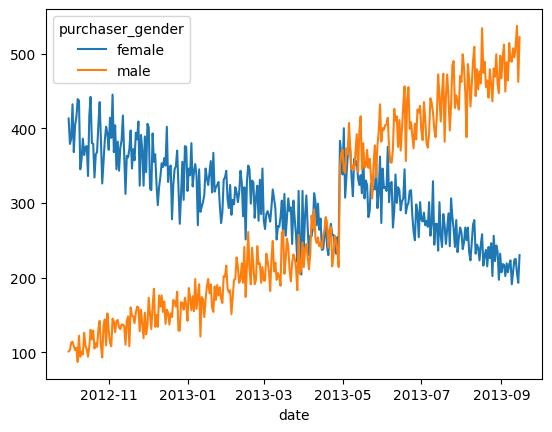

In [114]:
df_mf_sales.plot()


<Axes: xlabel='date'>

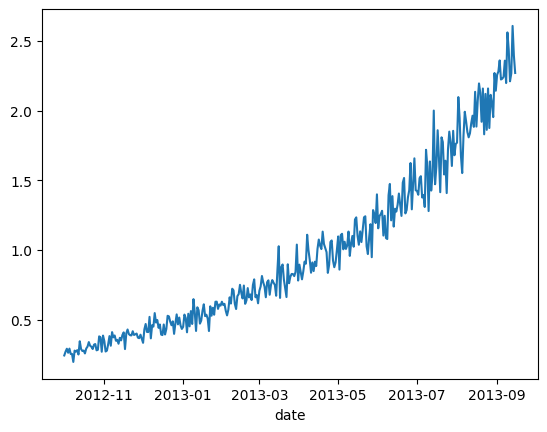

In [120]:
# get the male to female ratio of sales daily
df_mf_sales["sale_ratio_mf"] = df_mf_sales["male"] / df_mf_sales["female"]
df_mf_sales["sale_ratio_mf"].plot()


### Assume a given day is divided into four dayparts:


night (12:00AM - 6:00AM),
morning (6:00AM - 12:00PM),
afternoon (12:00PM - 6:00PM),
evening (6:00PM - 12:00AM).
### What is the percentage of sales in each daypart over all 50 weeks?

## Conclusion